<b><H1>Project Name : Mercedes-Benz Greener Manufacturing</H1></b><br>
Name: Daniel Manova<br>
Date: 30-05-2021<br>
Course: Post Graduate Program in AI and Machine Learning<br>
Cohort : PGP AIML FEB 2021 Cohort 1<br>

<b>Mercedes-Benz Greener Manufacturing.</b>

<u>Description</u>

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.
Find the datasets here.

In [1]:
#Initialize all necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRFClassifier,XGBRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the train and test data and display the shape
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train data shape:",train_df.shape) 
print("Test data shape :",test_df.shape)

Train data shape: (4209, 378)
Test data shape : (4209, 377)


In [3]:
#Display top 5 train data set
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Display top 5 test data set
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


<b>Perform Feature Analysis

In [5]:
#Drop ID column from Train and Test dataset and save it for future use
df_train_id = train_df["ID"]
df_test_id = test_df["ID"]
train_df = train_df.drop("ID",axis=1)
test_df = test_df.drop("ID",axis=1)

In [6]:
#Train data feature count based on data type
dtype_df_train = train_df.dtypes.reset_index()
dtype_df_train.columns = ["Count", "Column Type"]
dtype_df_train.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,368
1,float64,1
2,object,8


In [7]:
#Test data feature count based on data type
dtype_df_test = test_df.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,368
1,object,8


In [8]:
#Check the list of columns having variance in Train and Test data
print("Train data columns having variance:",train_df.var()[train_df.var()==0].index.values)
print("Test data columns having variance:",test_df.var()[test_df.var()==0].index.values)

Train data columns having variance: ['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X347']
Test data columns having variance: ['X257' 'X258' 'X295' 'X296' 'X369']


In [9]:
#Remove Columns not present in either Test or Train 
train_df = train_df.drop(['X257', 'X258', 'X295', 'X296', 'X369'], axis =1)
test_df = test_df.drop(['X107', 'X11', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297','X330', 'X347', 'X93'], axis =1)

In [10]:
#List all columns names having datatype as object
print("Train data catagorical features:",train_df.dtypes[train_df.dtypes == 'object'].index.values)
print("Test data catagorical features:",test_df.dtypes[test_df.dtypes == 'object'].index.values)

Train data catagorical features: ['X0' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X8']
Test data catagorical features: ['X0' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X8']


In [11]:
#Remove the variables having variance equals to zero
train_df = train_df.drop(train_df.var()[train_df.var()==0].index.values, axis=1)
test_df = test_df.drop(test_df.var()[test_df.var()==0].index.values, axis=1)

In [12]:
#Check if there are any variance
print('Variance in Train still ? :', train_df.var()[train_df.var()==0].index.values)
print('Variance in Test still ? :', test_df.var()[test_df.var()==0].index.values)

Variance in Train still ? : []
Variance in Test still ? : []


In [13]:
print("Train data shape after removing variance: ", train_df.shape)
print("Test data shape after removing variance: ", test_df.shape)

Train data shape after removing variance:  (4209, 360)
Test data shape after removing variance:  (4209, 359)


In [14]:
#Train data feature count based on data type after removing variance
dtype_train_df = train_df.dtypes.reset_index()
dtype_train_df.columns = ["Count", "Column Type"]
dtype_train_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,351
1,float64,1
2,object,8


In [15]:
#Train data feature count based on data type after removing variance
dtype_test_df = test_df.dtypes.reset_index()
dtype_test_df.columns = ["Count", "Column Type"]
dtype_test_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,351
1,object,8


In [16]:
#Check for null and unique values for test and train sets.
print("Null value count in Train data: ",train_df.isnull().sum().sum())
print("Null value count in Test data: ",train_df.isnull().sum().sum())

Null value count in Train data:  0
Null value count in Test data:  0


In [17]:
#List all unique elements in catagorical Train data
col_obj = train_df.columns[train_df.dtypes == 'object']
print("Unique elemwnts in Train data columns:-\n---------------------------------------\n")
for column in col_obj:
    print("Column -> ",column," : ",train_df[column].unique(),"\n")

Unique elemwnts in Train data columns:-
---------------------------------------

Column ->  X0  :  ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 

Column ->  X1  :  ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 

Column ->  X2  :  ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 

Column ->  X3  :  ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 

Column ->  X4  :  ['d' 'b' 'c' 'a'] 

Column ->  X5  :  ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 

Column ->  X6  :  ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b'] 

Column ->  X8  :  ['o' 'x'

In [18]:
#List all unique elements in catagorical Test data
col_obj = test_df.columns[test_df.dtypes == 'object']
print("Unique elemwnts in Test data columns:-\n---------------------------------------\n")
for column in col_obj:
    print("Column ->",column," : ",test_df[column].unique(),"\n")

Unique elemwnts in Test data columns:-
---------------------------------------

Column -> X0  :  ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb'] 

Column -> X1  :  ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab'] 

Column -> X2  :  ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u'] 

Column -> X3  :  ['f' 'a' 'c' 'e' 'd' 'g' 'b'] 

Column -> X4  :  ['d' 'b' 'a' 'c'] 

Column -> X5  :  ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa'] 

Column -> X6  :  ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b'] 

Colum

In [19]:
#Remove rows where objects not present in either Test or Train data
obj_dtype = train_df.dtypes[train_df.dtypes=='object'].index
for column in obj_dtype:
    train_df = train_df[train_df[column].isin(test_df[column]) == True]
    test_df = test_df[test_df[column].isin(train_df[column]) == True]

<b>Apply Label Encoder

In [20]:
#Perform Label Encoding on Unique 
le = LabelEncoder()
obj_columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for column in obj_columns:
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])

In [21]:
#Reset index on both train and test data
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [22]:
#List top 5 train data after Lable Encoding
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,76.26,17,24,29,2,3,26,9,23,0,...,0,0,0,0,0,0,1,0,0,0
1,80.62,17,21,29,5,3,26,11,4,0,...,0,0,0,0,0,0,0,0,0,0
2,78.02,17,23,29,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0
3,92.93,36,3,21,2,3,11,7,18,0,...,0,0,1,0,0,0,0,0,0,0
4,128.76,6,19,21,5,3,10,7,18,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#List top 5 test data after Lable Encoding
test_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,41,1,6,4,3,26,6,18,0,0,...,1,0,0,0,0,0,0,0,0,0
1,40,3,2,3,3,26,3,24,0,0,...,0,0,0,0,0,1,0,0,0,0
2,24,20,2,2,3,12,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,9,13,33,2,3,12,9,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,23,14,5,3,11,5,21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Defining feature and target data for train and test
features = train_df.drop(['y'],axis =1)
target = train_df['y']

In [25]:
#Perform Train test split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=4242)
print("X train data shape:", X_train.shape)
print("X test data shape:", X_test.shape)
print("y train data shape:",y_train.shape)
print("y test data shape:",y_test.shape)

X train data shape: (3356, 359)
X test data shape: (840, 359)
y train data shape: (3356,)
y test data shape: (840,)


In [26]:
#Removing catagorical features before performing Lable Encoding
X_train_cat = X_train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]
X_test_cat = X_test[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]
final_test_cat = test_df[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

X_train = X_train.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1)
X_test = X_test.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1)
final_test = test_df.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1)

In [27]:
#Reset the index value for catagorical data frame
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)
final_test_cat = final_test_cat.reset_index(drop=True)

<b>Apply PCA for dimensionality reduction

In [28]:
sklearn_pca = PCA(n_components=0.95, random_state=42)
sklearn_pca.fit(X_train)
X_train_transformed = sklearn_pca.transform(X_train)
X_test_transformed = sklearn_pca.transform(X_test) 
x_test_final = sklearn_pca.transform(final_test) 

print("After PCA Train shape : ", X_train_transformed.shape)
print("After PCA Test (Train) shape : ", X_test_transformed.shape)
print("After PCA Actual Test shape : ", x_test_final.shape)

After PCA Train shape :  (3356, 71)
After PCA Test (Train) shape :  (840, 71)
After PCA Actual Test shape :  (4184, 71)


In [29]:
#Convert array to dataframe on PCA data
pca_train = pd.DataFrame(X_train_transformed)
pca_test = pd.DataFrame(X_test_transformed)
pca_test_final = pd.DataFrame(x_test_final)

In [30]:
# Merge Label Encoded and PCA perfromed data
x_train_final = pd.concat([X_train_cat, pca_train],axis=1)
x_test_final =  pd.concat([X_test_cat, pca_test],axis=1)
test_final = pd.concat([final_test_cat, pca_test_final],axis=1)

In [31]:
#Shape of the final data considered for runing the models
print("Shape of X train : ",x_train_final.shape)
print("Shape of X test : ",x_test_final.shape)
print("Shape of final test : ",test_final.shape)

Shape of X train :  (3356, 79)
Shape of X test :  (840, 79)
Shape of final test :  (4184, 79)


<b>Model Using Linear Regression 

In [32]:
#Perform Linear Regression on PCA and Lable Encoded data
lr = LinearRegression()
lr.fit(x_train_final,y_train)
prediction_test_transformed = lr.predict(x_test_final)
rmse = (np.sqrt(mean_squared_error(y_test, prediction_test_transformed)))
r2 = r2_score(y_test, prediction_test_transformed)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is: {}'.format(rmse))
print('R2 score is: {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is: 8.594093798615681
R2 score is: 0.5374919855297149


<b>Model using XGB

In [33]:
#Perfrom XGB on PCA and Lable Encoded data
xgb= XGBRegressor(base_score=0.5,colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5, gamma=0.001, gpu_id=-1, n_estimators=400,booster='gbtree',learning_rate=0.1,importance_type='gain',max_delta_step=0, max_depth=2,min_child_weight=0,reg_lambda=35,objective='reg:squarederror')
xgb.fit(x_train_final,y_train)
predict_xgb = xgb.predict(x_test_final)

rmse = np.sqrt(mean_squared_error(y_test, predict_xgb))
r2 = r2_score(y_test, predict_xgb)

print("The model performance for testing set:-")
print("--------------------------------------")
print('RMSE is: {}'.format(rmse))
print('R2 score is: {}'.format(r2))

The model performance for testing set:-
--------------------------------------
RMSE is: 8.567324211788257
R2 score is: 0.5403688136942874


In [34]:
#Predicting on test data with the model and generate y value on test data
predict_xgb_test_final = xgb.predict(test_final)
test_df['y'] = predict_xgb_test_final
test_df['y'] = test_df['y'].apply(lambda x: round(x, 2))
test_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,41,1,6,4,3,26,6,18,0,0,...,0,0,0,0,0,0,0,0,0,90.86
1,40,3,2,3,3,26,3,24,0,0,...,0,0,0,0,1,0,0,0,0,111.26
2,24,20,2,2,3,12,3,0,0,0,...,0,1,0,0,0,0,0,0,0,97.65
3,9,13,33,2,3,12,9,13,0,0,...,0,0,0,0,0,0,0,0,0,116.85
4,33,23,14,5,3,11,5,21,0,0,...,0,0,0,0,0,0,0,0,0,93.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,4,9,14,5,3,0,9,4,0,0,...,0,0,0,0,0,0,0,0,0,108.33
4180,36,1,6,3,3,0,9,24,0,0,...,1,0,0,0,0,0,0,0,0,98.23
4181,41,23,14,5,3,0,3,22,0,0,...,0,0,0,0,0,0,0,0,0,92.63
4182,5,23,14,0,3,0,2,16,0,0,...,0,1,0,0,0,0,0,0,0,106.32


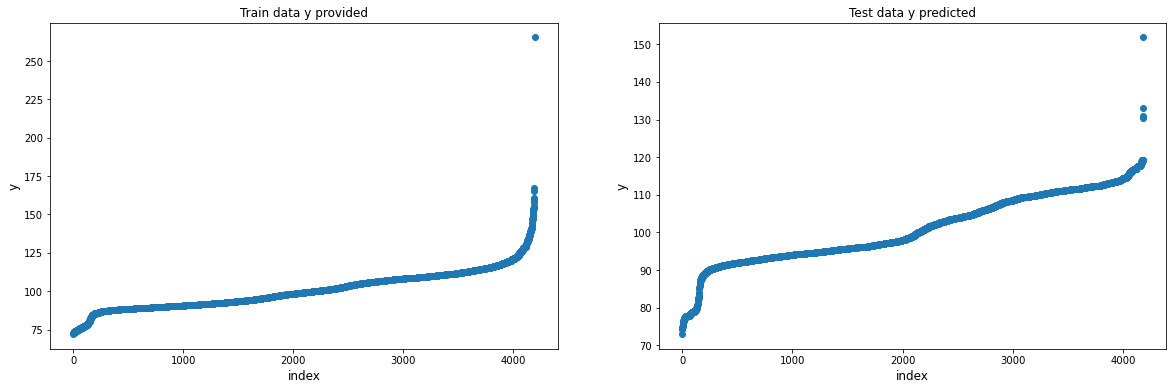

In [35]:
#Final Comparison figure for y value on train(provided) and test(predicted)
fig, ax = plt.subplots(1,2 , figsize=(20,6))

ax[0].set_title("Train data y provided", fontsize=12)
ax[0].scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
ax[0].set_xlabel('index', fontsize=12)
ax[0].set_ylabel('y', fontsize=12)

ax[1].set_title("Test data y predicted", fontsize=12)
ax[1].scatter(range(test_df.shape[0]), np.sort(test_df.y.values))
ax[1].set_xlabel('index', fontsize=12)
ax[1].set_ylabel('y', fontsize=12)
plt.show()


# End of Project

<b>--------------------------------------------------------------

<b>Predict using XGBoost - Method 2 Using Best Estimator (optional)

In [36]:
#To find best XGBoost Parameters
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

In [37]:
# Optimize the Hyperparameter using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
Random_Search=RandomizedSearchCV (xgb,params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 
# cv=10 - Number of folds in a `(Stratified)KFold`

In [39]:
# Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(X_train_transformed,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.5s finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.5, gamma=0.001,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=2, min_child_weight=0,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=400, n_jobs=12,
                                          num_par...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                     

In [40]:
# Print the best estimator
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
#Print the best parameters
Random_Search.best_params_

{'subsample': 0.3,
 'reg_lambda': 10,
 'reg_alpha': 1,
 'n_estimators': 100,
 'min_child_weight': 0,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.001,
 'colsample_bytree': 0.7}

In [42]:
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=0, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
# Check the r2 score of the model using Number of folds in a `(Stratified)KFold` cv=10
from sklearn.model_selection import cross_val_score,cross_val_predict
r2_Score = cross_val_score(xgb_reg,X_train_transformed,y_train,scoring='r2',cv=10)
#r2_Score = cross_val_score(xgb_reg,X_train,y_train,scoring='r2',cv=10)
r2_Score

array([0.54188131, 0.58071167, 0.63576471, 0.48183277, 0.57540368,
       0.35169735, 0.53120219, 0.45045628, 0.5616731 , 0.54028727])

In [44]:
print('r2_score of the model with cross validation is:',round(r2_Score.mean(),2))

r2_score of the model with cross validation is: 0.53


In [45]:
#Perfrom XGB on PCA and Lable Encoded data
xgb_reg.fit(X_train_transformed,y_train)
predict_xgb = xgb_reg.predict(X_test_transformed)

rmse = np.sqrt(mean_squared_error(y_test, predict_xgb))
r2 = r2_score(y_test, predict_xgb)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 8.696812866669777
R2 score is 0.5263698567090721
